In [1]:
import glob
import arrow
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
w = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m01d01.nc')
print(w)
print(w['tair'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    GRIB2_grid_template: 20
    NCO: 4.4.2
    History: Thu Dec 31 12:22:51 2015: ncatted -O -a time_origin,time_counter,c,c,1970-Jan-01 00:00:00 ops_y2015m01d01.nc
Thu Jan  1 09:39:36 2015: ncks -4 -L4 -O /ocean/sallen/allen/research/MEOPAR/Operational/ops_y2015m01d01.nc /ocean/sallen/allen/research/MEOPAR/Operational/ops_y2015m01d01.nc
created by wgrib2
    dimensions(sizes): time_counter(24), y(266), x(256)
    variables(dimensions): float32 atmpres(time_counter,y,x), float64 nav_lat(y,x), float64 nav_lon(y,x), float32 precip(time_counter,y,x), float32 qair(time_counter,y,x), float32 solar(time_counter,y,x), float32 tair(time_counter,y,x), float32 therm_rad(time_counter,y,x), float64 time_counter(time_counter), float32 u_wind(time_counter,y,x), float32 v_wind(time_counter,y,x), float64 x(x), float64 y(y)
    groups: 

<class 'netCDF4._netCDF4.Variable'>
float32 tair(time_cou

In [4]:
start ='2016-01-01'
end ='2016-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

solar_2016 = np.zeros(dayslen)
solar_2016_std = np.zeros(dayslen)
# percentcloud_2016 = np.zeros(dayslen)
# percentcloud_2016_std = np.zeros(dayslen)
therm_rad_2016 = np.zeros(dayslen)
therm_rad_2016_std = np.zeros(dayslen)
# LHTFL_2016 = np.zeros(dayslen)
# LHTFL_2016_std = np.zeros(dayslen)
tair_2016 = np.zeros(dayslen)
tair_2016_std = np.zeros(dayslen)

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    if i%50 == 0:
        print(i)
    tstr = glob.glob(f'/results/forcing/atmospheric/GEM2.5/operational/ops_y{yy}m{mm}d{dd}.nc')
    tnc = tstr[0]
    tn = nc.Dataset(tnc)
    solar_daily = np.nanmean(tn['solar'][:], axis = 0)
    solar_2016[i] = np.nanmean(solar_daily)
    solar_2016_std[i] = np.nanstd(solar_daily)
#     percentcloud_2016[i] = np.nanmean(tn['percentcloud'][:])
#     percentcloud_2016_std[i] = np.nanstd(tn['percentcloud'][:])
    therm_rad_daily = np.nanmean(tn['therm_rad'][:], axis = 0)
    therm_rad_2016[i] = np.nanmean(therm_rad_daily)
    therm_rad_2016_std[i] = np.nanstd(therm_rad_daily)
#     LHTFL_surface_2016[i] = np.nanmean(tn['LHTFL_surface'][:])
#     LHTFL_surface_2016_std[i] = np.nanstd(tn['LHTFL_surface'][:])
    tair_daily = np.nanmean(tn['tair'][:], axis = 0)
    tair_2016[i] = np.nanmean(tair_daily)
    tair_2016_std[i] = np.nanstd(tair_daily)

0
50
100
150
200
250
300
350


In [13]:
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

solar_2015 = np.zeros(dayslen)
solar_2015_std = np.zeros(dayslen)
# percentcloud_2015 = np.zeros(dayslen)
# percentcloud_2015_std = np.zeros(dayslen)
therm_rad_2015 = np.zeros(dayslen)
therm_rad_2015_std = np.zeros(dayslen)
# LHTFL_2015 = np.zeros(dayslen)
# LHTFL_2015_std = np.zeros(dayslen)
tair_2015 = np.zeros(dayslen)
tair_2015_std = np.zeros(dayslen)

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    if i%50 == 0:
        print(i)
    tstr = glob.glob(f'/results/forcing/atmospheric/GEM2.5/operational/ops_y{yy}m{mm}d{dd}.nc')
    tnc = tstr[0]
    tn = nc.Dataset(tnc)
    solar_daily = np.nanmean(tn['solar'][:], axis = 0)
    solar_2015[i] = np.nanmean(solar_daily)
    solar_2015_std[i] = np.nanstd(solar_daily)
#     percentcloud_2015[i] = np.nanmean(tn['percentcloud'][:])
#     percentcloud_2015_std[i] = np.nanstd(tn['percentcloud'][:])
    therm_rad_daily = np.nanmean(tn['therm_rad'][:], axis = 0)
    therm_rad_2015[i] = np.nanmean(therm_rad_daily)
    therm_rad_2015_std[i] = np.nanstd(therm_rad_daily)
#     LHTFL_surface_2015[i] = np.nanmean(tn['LHTFL_surface'][:])
#     LHTFL_surface_2015_std[i] = np.nanstd(tn['LHTFL_surface'][:])
    tair_daily = np.nanmean(tn['tair'][:], axis = 0)
    tair_2015[i] = np.nanmean(tair_daily)
    tair_2015_std[i] = np.nanstd(tair_daily)

0
50
100
150
200
250
300
350


In [14]:
pickle.dump(solar_2015, open("solar_2015.pkl", 'wb'))
pickle.dump(solar_2015_std, open("solar_2015_std.pkl", 'wb'))
pickle.dump(therm_rad_2015, open("therm_rad_2015.pkl", 'wb'))
pickle.dump(therm_rad_2015_std, open("therm_rad_2015_std.pkl", 'wb'))
pickle.dump(tair_2015, open("tair_2015.pkl", 'wb'))
pickle.dump(tair_2015_std, open("tair_2015_std.pkl", 'wb'))

pickle.dump(solar_2016, open("solar_2016.pkl", 'wb'))
pickle.dump(solar_2016_std, open("solar_2016_std.pkl", 'wb'))
pickle.dump(therm_rad_2016, open("therm_rad_2016.pkl", 'wb'))
pickle.dump(therm_rad_2016_std, open("therm_rad_2016_std.pkl", 'wb'))
pickle.dump(tair_2016, open("tair_2016.pkl", 'wb'))
pickle.dump(tair_2016_std, open("tair_2016_std.pkl", 'wb'))


In [6]:
## load saved files 

In [15]:
solar_2015 = pickle.load(open('solar_2015.pkl', 'rb'))  
solar_2015_std = pickle.load(open('solar_2015_std.pkl', 'rb'))  
therm_rad_2015 = pickle.load(open('therm_rad_2015.pkl', 'rb'))  
therm_rad_2015_std = pickle.load(open('therm_rad_2015_std.pkl', 'rb'))  
tair_2015 = pickle.load(open('tair_2015.pkl', 'rb'))  
tair_2015_std = pickle.load(open('tair_2015_std.pkl', 'rb'))  

solar_2016 = pickle.load(open('solar_2016.pkl', 'rb'))  
solar_2016_std = pickle.load(open('solar_2016_std.pkl', 'rb'))  
therm_rad_2016 = pickle.load(open('therm_rad_2016.pkl', 'rb'))  
therm_rad_2016_std = pickle.load(open('therm_rad_2016_std.pkl', 'rb'))  
tair_2016 = pickle.load(open('tair_2016.pkl', 'rb'))  
tair_2016_std = pickle.load(open('tair_2016_std.pkl', 'rb'))  

Text(0.5, 0.98, 'Some weather model parameters \n (model domain average, one std. dev shown)')

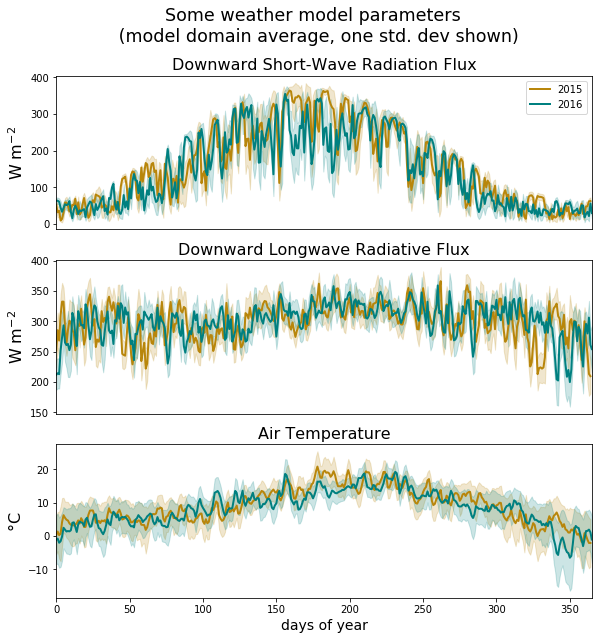

In [16]:

fact = 1.2
fig = plt.figure(figsize=(8*fact, 8*fact))
fs = 14

#summertime mean
ax = plt.subplot2grid((3,1), (0,0), colspan=1, rowspan=1)
ax.plot(np.arange(0,365,1),solar_2015, color = 'darkgoldenrod', linewidth = 2, label = '2015')
plt.fill_between(np.arange(0,365,1),solar_2015-solar_2015_std, solar_2015+solar_2015_std, \
                color = 'darkgoldenrod', alpha = 0.2)

ax.plot(np.arange(0,366,1),solar_2016, color = 'teal', linewidth = 2, label = '2016')
plt.fill_between(np.arange(0,366,1),solar_2016-solar_2016_std, solar_2016+solar_2016_std, \
                color = 'teal', alpha = 0.2)
ax.legend(loc = 'best')

ax.set_xlim([0,365])
ax.set_title('Downward Short-Wave Radiation Flux', fontsize = fs+2)
ax.set_ylabel('W m$^{-2}$', fontsize = fs+2)
ax.set_xticks([])

ax = plt.subplot2grid((3,1), (1,0), colspan=1, rowspan=1)
ax.plot(np.arange(0,365,1),therm_rad_2015, color = 'darkgoldenrod', linewidth = 2)
plt.fill_between(np.arange(0,365,1),therm_rad_2015-therm_rad_2015_std, therm_rad_2015+therm_rad_2015_std, \
                color = 'darkgoldenrod', alpha = 0.2)

ax.plot(np.arange(0,366,1),therm_rad_2016, color = 'teal', linewidth = 2)
plt.fill_between(np.arange(0,366,1),therm_rad_2016-therm_rad_2016_std, therm_rad_2016+therm_rad_2016_std, \
                color = 'teal', alpha = 0.2)
ax.set_xlim([0,365])
ax.set_title('Downward Longwave Radiative Flux', fontsize = fs+2)
ax.set_ylabel('W m$^{-2}$', fontsize = fs+2)
ax.set_xticks([])

ax = plt.subplot2grid((3,1), (2,0), colspan=1, rowspan=1)
ax.plot(np.arange(0,365,1),tair_2015-273, color = 'darkgoldenrod', linewidth = 2)
plt.fill_between(np.arange(0,365,1),tair_2015-273-tair_2015_std, tair_2015-273+tair_2015_std, \
                color = 'darkgoldenrod', alpha = 0.2)

ax.plot(np.arange(0,366,1),tair_2016-273, color = 'teal', linewidth = 2)
plt.fill_between(np.arange(0,366,1),tair_2016-273-tair_2016_std, tair_2016-273+tair_2016_std, \
                color = 'teal', alpha = 0.2)
ax.set_xlim([0,365])
ax.set_title('Air Temperature', fontsize = fs+2)
ax.set_ylabel('$\degree$C', fontsize = fs+2)
ax.set_xlabel('days of year', fontsize = fs)

plt.suptitle('Some weather model parameters \n (model domain average, one std. dev shown)',\
            fontsize = fs+3.5)

## fraser river flow for 4 years

In [9]:
# ##code for getting fraser details
# # import sys
# # sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
# # #import mocsy
# # import river_201702 as rv

# # rv.prop_dict['fraser']

# grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# #area fraser
# f_area = grid['e1t'][0,500,394]*grid['e2t'][0,500,394]

# start ='2013-01-01'
# end ='2013-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# Fraser_2013 = np.zeros(dayslen)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     if i%50 == 0:
#         print(i)
#     tstr = glob.glob(f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc')
#     tnc = tstr[0]
#     #dis where the fraser is
#     tn = nc.Dataset(tnc)
#     ro = tn['rorunoff'][0,500,394]
#     Fraser_2013[i] = ro / 1000 * f_area
    
    

# #/results/forcing/rivers/RLonFraCElse_y2019m01d09.nc

In [10]:
# start ='2014-01-01'
# end ='2014-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# Fraser_2014 = np.zeros(dayslen)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     if i%50 == 0:
#         print(i)
#     tstr = glob.glob(f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc')
#     tnc = tstr[0]
#     #dis where the fraser is
#     tn = nc.Dataset(tnc)
#     ro = tn['rorunoff'][0,500,394]
#     Fraser_2014[i] = ro / 1000 * f_area
    
# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# Fraser_2015 = np.zeros(dayslen)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     if i%50 == 0:
#         print(i)
#     tstr = glob.glob(f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc')
#     tnc = tstr[0]
#     #dis where the fraser is
#     tn = nc.Dataset(tnc)
#     ro = tn['rorunoff'][0,500,394]
#     Fraser_2015[i] = ro / 1000 * f_area
# start ='2016-01-01'
# end ='2016-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# Fraser_2016 = np.zeros(dayslen)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     if i%50 == 0:
#         print(i)
#     tstr = glob.glob(f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc')
#     tnc = tstr[0]
#     #dis where the fraser is
#     tn = nc.Dataset(tnc)
#     ro = tn['rorunoff'][0,500,394]
#     Fraser_2016[i] = ro / 1000 * f_area

# pickle.dump(Fraser_2013, open("Fraser_2013.pkl", 'wb'))
# pickle.dump(Fraser_2014, open("Fraser_2014.pkl", 'wb'))
# pickle.dump(Fraser_2015, open("Fraser_2015.pkl", 'wb'))
# pickle.dump(Fraser_2016, open("Fraser_2016.pkl", 'wb'))


In [11]:
Fraser_2013 = pickle.load(open('Fraser_2013.pkl', 'rb'))  
Fraser_2014 = pickle.load(open('Fraser_2014.pkl', 'rb'))  
Fraser_2015 = pickle.load(open('Fraser_2015.pkl', 'rb'))  
Fraser_2016 = pickle.load(open('Fraser_2016.pkl', 'rb'))  


Text(0.5, 0, 'day of year')

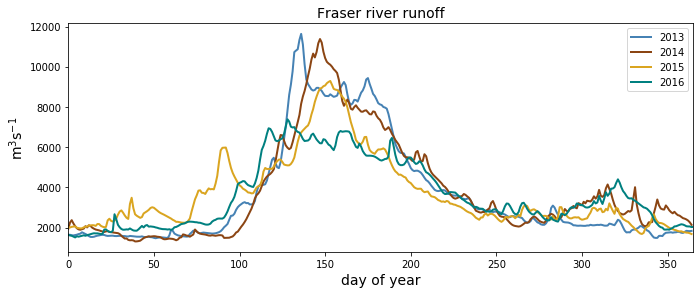

In [12]:
fact = 1.4
fig = plt.figure(figsize=(8*fact, 3*fact))
fs = 14

#summertime mean
ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)
ax.plot(np.arange(0,365,1),Fraser_2013, linewidth = '2', color = 'steelblue', label = '2013')
ax.plot(np.arange(0,365,1),Fraser_2014, linewidth = '2', color = 'saddlebrown', label = '2014')
ax.plot(np.arange(0,365,1),Fraser_2015, linewidth = '2', color = 'goldenrod', label = '2015')
ax.plot(np.arange(0,366,1),Fraser_2016, linewidth = '2', color = 'teal', label = '2016')
ax.set_xlim([0,365])
ax.legend(loc='best')
ax.set_title('Fraser river runoff',fontsize = fs)
ax.set_ylabel('m$^3$s$^{-1}$', fontsize = fs)
ax.set_xlabel('day of year', fontsize = fs)